# Random Forest Model

In [1]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'


# Read in initial file
#df = pd.read_csv(folder_path + 'concatenated_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score'])


# Read in data with surveys
# df = pd.read_csv(folder_path + 'activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

# Read in data with feature engineering
df = pd.read_csv(folder_path + '23_02_activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'steps_per_hour', 'totalDistance', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

print(df.head())
print(df.shape)

                          participantId  bodyMass_kg  height_m        bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174       51.256    1.5748  20.667783   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371       59.874    1.6510  21.965653   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661       59.874    1.7018  20.673844   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664       77.111    1.8034  23.710036   
4  080bacc1-4661-4735-acca-7d27ad1a4192       90.718    1.8034  27.893906   

   mean_hr/s  hr_duration_(s)  max_hr  min_hr  totalSteps  steps_per_hour  \
0   1.438426             47.0   1.783   1.017      4454.0     2518.755891   
1   1.290195             41.0   1.517   1.150        61.0      152.394171   
2   1.107266             64.0   1.783   0.617     10790.0     1932.729625   
3   1.056040            176.0   1.967   0.850      3819.0     1741.405953   
4   1.179194             72.0   1.883   0.900     12734.0     3180.849292   

   ...  wake_up_choices  wake_ups  weekly_naps  noise_light  stress_thinki

In [2]:
# Train test split

from sklearn.model_selection import GroupKFold, GridSearchCV

gkf = GroupKFold(n_splits=10)


In [3]:
# X - features

### 1.
# X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration']].values

### 2.
# X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

### 3.
X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','steps_per_hour','totalDistance','dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Lists to store evaluation metrics
train_rmse_scores = []
test_rmse_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []



In [6]:
import numpy as np

# Dataframe to store all predictions

column_names = ['participantId','bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'actual_ssq', 'prediction']


all_predictions_df = pd.DataFrame(columns=column_names)

print("\n Groups are: ")
print(groups)
print(type(groups))

for i, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_groups = groups[train_index]
    print(f"Fold {i}:")
    '''
    # just to check the groups are being split correctly
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")'''
    
    rf.fit(X_train, y_train)

    # Evaluate on train data

    train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    train_rmse_scores.append(train_rmse)

    print(f"Made training predictions for fold {i}.")

    test_pred = rf.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    test_rmse_scores.append(test_rmse)

    print(f"Made testing predictions for fold {i}.")

    # Predicted and actual values
    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)
    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)

    for j, prediction in enumerate(test_pred):
        print(f"Predicted: {prediction:.2f}, features: {X_test[j]}")

    # Dataframe to store predcitions for this fold

    fold_predictions_df = pd.DataFrame(columns=column_names)
    fold_predictions_df['participantId'] = groups[test_index]
    fold_predictions_df.iloc[:, 1:len(column_names) - 2] = X_test
    fold_predictions_df['actual_ssq'] = y_test
    fold_predictions_df['prediction'] = test_pred

    all_predictions_df = pd.concat([all_predictions_df, fold_predictions_df], ignore_index=True)

    print(f"Concatenated predictions for fold {i}.")



# Average scores
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

print("Average Train RMSE:", avg_train_rmse)
print("Average Test RMSE: ", avg_test_rmse)
    


 Groups are: 
['00a55fb5-da33-4e2e-ae61-28f589fcc174'
 '00fd4039-9b5e-4bbb-8295-4983a3f58371'
 '02d5125e-684f-4166-a3b7-5df1bcfc1661'
 '080292d4-a0b0-4dd7-a7dd-191c8ac71664'
 '080bacc1-4661-4735-acca-7d27ad1a4192'
 '0b79acd2-ea0b-406f-aa41-e48b98f19bb4'
 '0f00f803-6e81-4b77-9efc-3be73b5bface'
 '0f279ffd-a1b5-473f-9cfc-01e5510ea5a4'
 '156fe69a-1c98-4337-b310-aee985e94279'
 '1aaad641-a3b6-4e47-a010-e8cb01ce3d03'
 '1cba6631-3fb8-4c18-904f-ab56fe82833d'
 '2035bccf-5650-4689-bbac-c43b37bc4246'
 '20d71ad7-40bc-4b70-9de4-55a94dd92576'
 '21b0fa2e-1270-4295-b3d2-01d23585a4fc'
 '236db0aa-fbd0-4762-894f-ccff18e7c355'
 '24071a4d-2b47-413c-ba92-4f33ef68d48c'
 '25e5e83e-a7c1-45e5-a00f-03aa197848d9'
 '26625914-859a-4a4d-8127-d77c2975aab5'
 '2a673b3f-21e2-4fe3-a007-0b236fdb5f2f'
 '27cae614-7207-4e3b-bcc0-effd45768c1d'
 '2d6ca52e-2ec8-4cc1-a1a3-27d67a4f3b96'
 '2f2cf9c1-1761-40e4-aafa-3d185343cb90'
 '3239821e-0f49-4c3e-9803-fb37aadf4594'
 '358d6f00-a8ab-458f-a8c1-12048908b966'
 '358d6f00-a8ab-458f-a8c1

In [7]:
# print predictions df

print(all_predictions_df.head(10))

# save to csv

all_predictions_df.to_csv(save_path + 'random_forest_predictions.csv', index=False)

                          participantId bodyMass_kg  height_m        bmi  \
0  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
1  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
2  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
3  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
4  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
5  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
6  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
7  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
8  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   
9  bb3b8938-47f4-42b5-a5f1-4b29fe5f5b99      92.533  1.888067  25.957448   

  mean_hr/s hr_duration_(s) max_hr min_hr totalSteps stepsTotalDuration  ...  \
0  0.978325            77.0  1.183    0.7    10967.0        2770.416111  ...   
1  

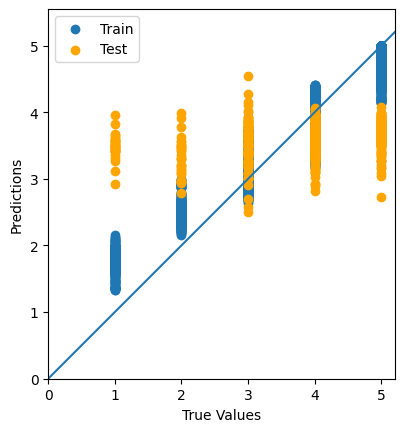

In [8]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


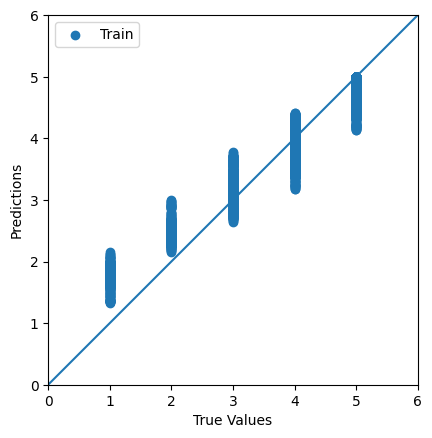

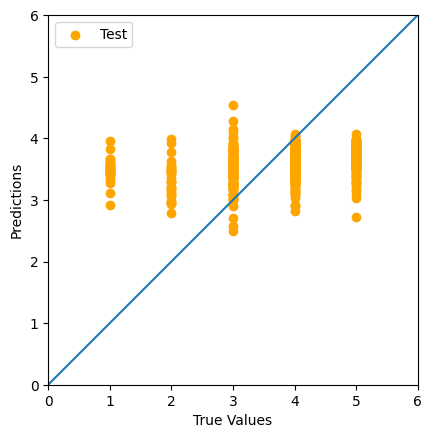

In [9]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


# Plot the results

import matplotlib.pyplot as plt

plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()
